In [1]:
import pandas as pd
import requests

### Scraping CraftedNBA

In [2]:
url = "https://craftednba.com/player-traits/length"

In [3]:
data = requests.get(url)

In [4]:
with open("heights.html", "w+") as f:
    f.write(data.text)

In [5]:
from bs4 import BeautifulSoup

In [6]:
with open("heights.html") as f:
    page = f.read()

In [7]:
soup = BeautifulSoup(page,"html.parser")


In [8]:
table = soup.find('div', {'class': 'table-wrapping is-responsive'})

In [9]:
df = pd.read_html(str(table))[0]

In [10]:
df

,#,Name,length,height,wingspan
0,1,Mo Bamba ORL | C,10.75,"6'11.25""","7'10"""
1,2,Talen Horton-Tucker LAL | SF,10.75,"6'2.5""","7'1.25"""
2,3,Eric Paschall UTA | PF,9.75,"6'6""","7'3.75"""
3,4,Jalen Williams OKC | SG,9.75,"6'4.5""","7'2.25"""
4,5,Isaiah Stewart DET | C,9.50,"6'7.25""","7'4.75"""
...,...,...,...,...,...
449,450,Killian Tillie MEM | PF,-0.75,"6'8.75""","6'8"""
450,451,Kelly Olynyk DET | C,-1.00,"6'10.75""","6'9.75"""
451,452,Kyle Kuzma WAS | PF,-1.00,"6'8""","6'7"""
452,453,Tyler Herro MIA | SG,-1.25,"6'4.5""","6'3.25"""


### data is easy to pull but poorly formated. No years on the players, it's just current players. Need to get a new source

In [11]:
from matplotlib import pyplot as plt

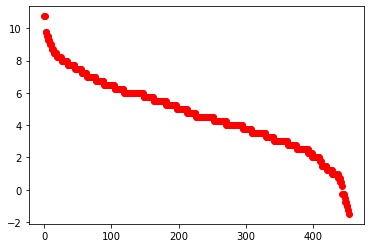

In [12]:
plt.plot(df['length'], 'ro')

### Scrapping NBA.com w/ web driver

In [30]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path="/Users/charlesguthmann/Downloads/code/projects/gobertproject/chromedriver")

/var/folders/54/rt49ghfs4x10mrlvx7bchy980000gn/T/ipykernel_21914/3778157666.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="/Users/charlesguthmann/Downloads/code/projects/gobertproject/chromedriver")


In [32]:
url2 = 'https://www.nba.com/stats/draft/combine-anthro/'
import time

In [33]:
driver.get(url2)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)
html = driver.page_source

In [34]:
 with open("players.html",'w+') as f:
        f.write(html)

In [51]:
with open("players.html",) as f:
        page = f.read()

In [52]:
soup = BeautifulSoup(page,"html.parser")

In [56]:
nbaweb = soup.find('div', {'class': 'nba-stat-table'})

In [122]:
nbatable = pd.read_html(str(nbaweb))[0]

In [123]:
nbatable = nbatable.dropna()

In [124]:
nbatable

,PLAYER,POS,BODY FAT %,HAND LENGTH (inches),HAND WIDTH (inches),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN
0,Ochai Agbaji,SG,5.40%,8.75,9.50,6' 4.50'',6' 5.75'',8' 8.00'',216.8,6' 10.25''
1,Patrick Baldwin Jr.,SF,8.90%,8.75,9.50,6' 9.25'',6' 10.25'',9' 2.50'',230.8,7' 1.75''
3,Dominick Barlow,PF,5.90%,9.00,10.50,6' 8.75'',6' 9.75'',9' 0.50'',221.0,7' 3.00''
4,MarJon Beauchamp,SG,5.30%,9.00,9.00,6' 5.25'',6' 6.50'',8' 10.00'',196.6,7' 0.75''
5,Hugo Besson,SG,8.80%,7.50,8.50,6' 4.50'',6' 5.75'',8' 6.00'',180.4,6' 5.50''
...,...,...,...,...,...,...,...,...,...,...
75,Alondes Williams,SG,7.20%,8.50,9.25,6' 3.75'',6' 5.00'',8' 6.00'',209.0,6' 7.00''
76,Jalen Williams,SG,8.90%,8.50,9.50,6' 4.50'',6' 5.75'',8' 9.50'',209.2,7' 2.25''
77,Jaylin Williams,C,8.00%,8.50,10.50,6' 8.75'',6' 10.00'',9' 0.50'',236.6,7' 1.00''
78,Trevion Williams,C,10.80%,9.00,10.25,6' 7.25'',6' 8.75'',9' 0.50'',264.6,7' 2.75''


In [125]:
nbatable.columns[4]

'HAND\xa0WIDTH\xa0(inches)'

In [126]:
nbatable = nbatable.rename(columns={ nbatable.columns[2]: "bodyfat" })
nbatable = nbatable.rename(columns={ nbatable.columns[3]: "handlength" })
nbatable = nbatable.rename(columns={ nbatable.columns[4]: "handwidth" })
nbatable = nbatable.rename(columns={ nbatable.columns[5]: "noshoes" })
nbatable = nbatable.rename(columns={ nbatable.columns[6]: "shoes" })
nbatable = nbatable.rename(columns={ nbatable.columns[7]: "standingreach" })
nbatable = nbatable.rename(columns={ nbatable.columns[8]: "weight" })

In [127]:
nbatable.dtypes

PLAYER           object
POS              object
bodyfat          object
handlength       object
handwidth        object
noshoes          object
shoes            object
standingreach    object
weight           object
WINGSPAN         object
dtype: object

In [128]:
nbatable = nbatable.apply(pd.to_numeric, errors ='ignore')

In [154]:
def parse_ht(ht):
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("''",""))
    return (12*ft_) + in_
    

## nbatable['noshoes'] = nbatable["noshoes"].apply(lambda x:parse_ht(x))

In [150]:
nbatable['shoes'] = nbatable["shoes"].apply(lambda x:parse_ht(x))

In [152]:
nbatable['standingreach'] = nbatable["standingreach"].apply(lambda x:parse_ht(x))

In [162]:
nbatable['WINGSPAN'] = nbatable["WINGSPAN"].apply(lambda x:parse_ht(x))

In [160]:
nbatable['bodyfat'] = nbatable['bodyfat'].str.replace("%","")

In [165]:
nbatable = nbatable.apply(pd.to_numeric, errors ='ignore')

In [166]:
nbatable.dtypes

PLAYER            object
POS               object
bodyfat          float64
handlength       float64
handwidth        float64
noshoes          float64
shoes            float64
standingreach    float64
weight           float64
WINGSPAN         float64
dtype: object

<AxesSubplot:xlabel='PLAYER'>

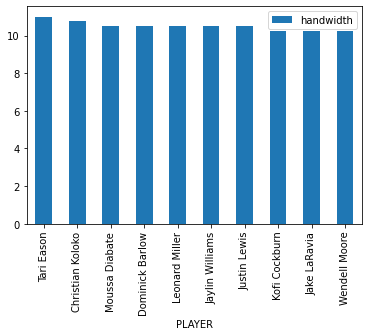

In [180]:
nbatable = nbatable.sort_values("handwidth", ascending = False)
gigababy = nbatable.head(10)
gigababy.plot.bar("PLAYER","handwidth")

In [181]:
import seaborn as sns

<AxesSubplot:>

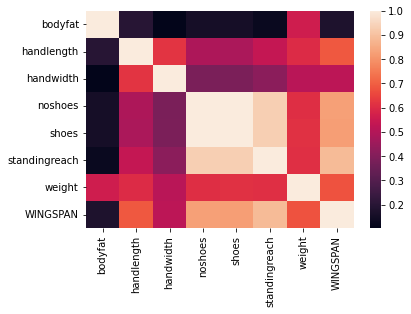

In [183]:
sns.heatmap(nbatable.corr())